In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt

Nmax = 3000

In [258]:
def teorica(p,N,i,b):
    q = 1-p
    qp = q/p
    return ((1-(qp**(i/b)))/(1-(qp**(N/b))) if q!=p else i/N)

In [268]:
def partida(p,N,i,bet):
    t = 0
    vt = []
    vi = []
    res = 0
    while((i>0)and(i<N)):
        if(np.random.uniform() < p):
            i = i + bet
        else:
            i = i - bet
        vi.append(i)
        vt.append(t)
        t = t + 1
    if i >= N:
        res = 1
    return {'result':res,'rounds':t,'vrounds': vt,'vamount': vi}

In [167]:
def simula(p,N,i,bet,Nmax):
    wins = []
    vsim = []
    vrounds = []
    
    for nsim in np.arange(10,Nmax,10):
        rounds = 0
        win = 0
        for j in range(1,nsim):
            play = partida(p,N,i,bet)
            win = win + play['result']
            rounds = rounds + play['rounds']
        wins.append(win/nsim)
        vsim.append(nsim)
        vrounds.append(rounds/nsim)
    return [vsim,wins,vrounds]

In [240]:
p = 0.49
N = 16
i = 6
bet = 2
Nmax = 1000
sim = simula(p,N,i,bet,Nmax)

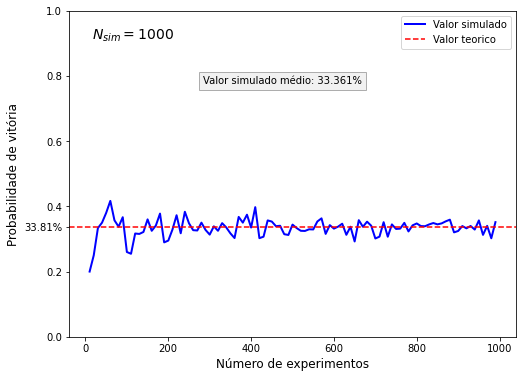

In [241]:
plt.figure(figsize = (8,6))
plt.plot(sim[0],sim[1], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
plt.axhline(y=teorica(p,N,i,bet), color='r', linestyle ='--', label = 'Valor teorico')
plt.ylabel("Probabilidade de vitória", fontsize=12)
plt.xlabel("Número de experimentos", fontsize = 12)
#plt.suptitle(f"Probabilidade de acumular R${N}, começando com R${i}, apostando R${bet}", fontsize = 16)
#plt.xlim(0.0,Nmax)

#plt.ylim(0.0,1.0)
plt.gca().text(0.3,0.8,"Valor simulado médio: "+"{:.3%}".format(np.mean(sim[1])), bbox=dict(facecolor='lightgrey', alpha=0.3),transform=plt.gca().transAxes,
     verticalalignment='top')
plt.legend()
locs, labels = plt.yticks()  # Get the current locations and labels.
plt.yticks(np.arange(0, 1, step=0.2))  # Set label locations.
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0,teorica(p,N,i,bet)],[0.0,0.2,0.4,0.6,0.8,1.0,"{:.2%}".format(teorica(p,N,i,bet))])

text = r"$N_{sim} = $" +f"{Nmax}"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

plt.show(True)

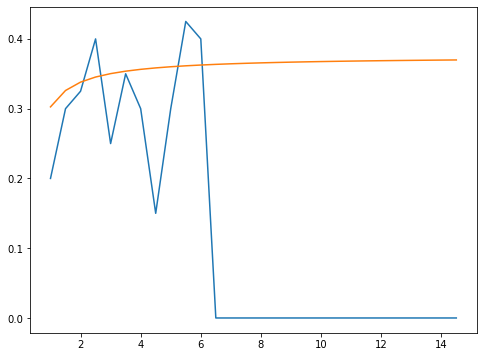

In [244]:
p = 0.49
N = 16
i = 6
bet = np.arange(1,15,0.5)
Nmax = 30
medias = []

for b in bet:
    medias.append(np.mean(simula(p,N,i,b,Nmax)[1]))
plt.figure(figsize = (8,6))
plt.plot(bet,medias)
plt.plot(bet,[teorica(p,N,i,b) for b in bet])
plt.show(True)

In [248]:

colors = ['blue','green','lime','orange','black','magenta']
bet = np.arange(0.5,12,0.2)
aux = 0 
p = 0.49
N = 16
i = 12
Nmax = 3000
medias = []

for b in bet:
    medias.append(np.mean(simula(p,N,i,b,Nmax)[1]))
    

<Figure size 576x432 with 0 Axes>

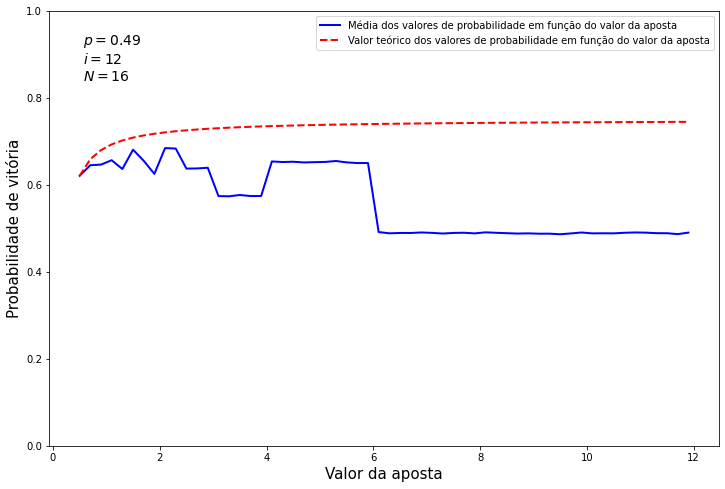

[0.6206674534913529,
 0.6589801627878523,
 0.6799450897157402,
 0.6931114636847469,
 0.7021317745727056,
 0.7086921291482589,
 0.7136756259544758,
 0.7175886530615349,
 0.7207420884304382,
 0.7233372235577534,
 0.7255100844412056,
 0.7273558731668436,
 0.7289432004406303,
 0.7303227564978679,
 0.7315327991775182,
 0.7326027428022935,
 0.7335555724028437,
 0.7344095084080845,
 0.7351791798099693,
 0.7358764671094566,
 0.7365111185831692,
 0.7370912079114587,
 0.7376234788349223,
 0.7381136080802367,
 0.7385664083007912,
 0.7389859864091775,
 0.7393758683339313,
 0.7397390982216878,
 0.740078317988749,
 0.7403958316172022,
 0.7406936575023608,
 0.7409735713637939,
 0.74123714164631,
 0.7414857589005761,
 0.7417206603047565,
 0.7419429502394044,
 0.7421536176372081,
 0.7423535506823378,
 0.7425435493199324,
 0.7427243359471003,
 0.7428965645864827,
 0.7430608287878594,
 0.7432176684588296,
 0.7433675757901959,
 0.7435110004129816,
 0.7436483539007988,
 0.74378001371262,
 0.743906326655307

In [267]:
plt.figure(figsize = (12,8))
plt.plot(bet,medias,linestyle='-',color = 'blue',linewidth=2,label="Média dos valores de probabilidade em função do valor da aposta")
plt.plot(bet,[teorica(p,N,i,b) for b in bet],linestyle='--',color = 'r',linewidth=2,label="Valor teórico dos valores de probabilidade em função do valor da aposta")
plt.ylabel("Probabilidade de vitória", fontsize=15)
plt.xlabel("Valor da aposta", fontsize = 15)
plt.ylim(0,1)
plt.legend()
text = r"$p = $" +f"{p}" + "\n$i = $"+f"{i}"+ "\n$N = $"+f"{N}"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

plt.show(True)
medias
[teorica(p,N,i,b) for b in bet]


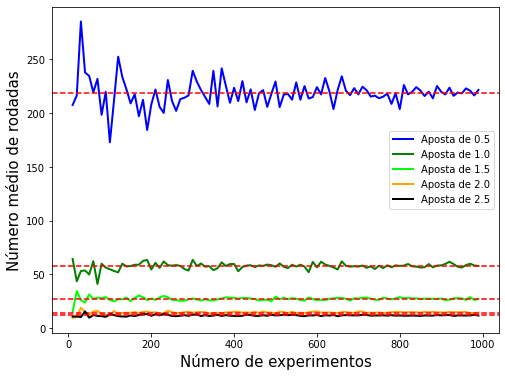

In [24]:
plt.figure(figsize = (8,6))
colors = ['blue','green','lime','orange','black','magenta']
bet = np.arange(0.5,3,0.5)
aux = 0 
p = 0.49
N = 16
i = 6
for b in bet:
    sim = simula(p,N,i,b,1000)
    plt.plot(sim[0],sim[2],linestyle='-',color = colors[aux],linewidth=2,label=f"Aposta de {b}")
    plt.axhline(y=np.mean(sim[2]), color='r', linestyle ='--')
    aux = aux+1
plt.ylabel("Número médio de rodadas", fontsize=15)
plt.xlabel("Número de experimentos", fontsize = 15)
plt.legend()
plt.show(True)

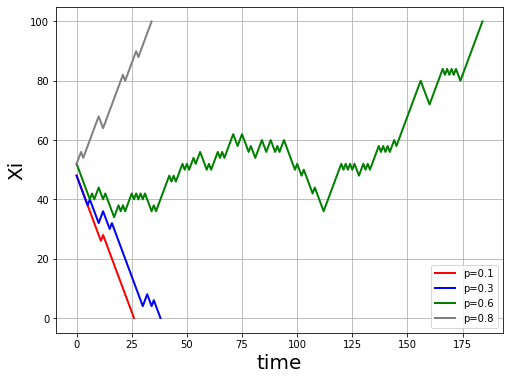

In [7]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
i = 50
bet = 2

vp = [0.1, 0.3, 0.6, 0.8]
colors = ['red', 'blue', 'green', 'gray', 'magenta']
plt.figure(figsize=(8,6))
aux = 0
for p in vp:
    play = partida(p,N,i,bet)
    plt.plot(play['vrounds'], play['vamount'], linestyle='-', color=colors[aux], linewidth=2, label = 'p='+str(p))
    plt.xlabel("time", fontsize=20)
    plt.ylabel("Xi", fontsize=20)
    aux = aux + 1
plt.legend()
plt.grid(True)
plt.show(True)

In [8]:
qp = 0.51/0.49
p = (1-qp**1)/(1-qp**6)
p

0.15045283827651051

In [40]:
p = 0.49
N = 16
i = 6
b = 2
teorica(p,N,i,b)

0.33806852431337886